
# Import all the necessary modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

# Read the dataset from remote machine

In [3]:
exercise = pd.read_csv("/Users/vipulghare/Desktop/ETL Hive/csvfiles/sidhardhan/Regression/Calories/exercise.csv")

In [4]:
exercise

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


In [5]:
calories = pd.read_csv("/Users/vipulghare/Desktop/ETL Hive/csvfiles/sidhardhan/Regression/Calories/calories.csv")

In [6]:
calories

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


In [16]:
from pandasql import sqldf

In [22]:
A = sqldf("select exercise.User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories from exercise join calories on (exercise.User_ID=calories.User_ID)")

# Preview the dataset

In [24]:
A.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


# Get information about the dataset

In [25]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


# Describe function will tell you more about the dataset

In [26]:
A.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


# Check the collinearity

In [27]:
A.corr()["Calories"].sort_values()

User_ID      -0.001661
Height        0.017537
Weight        0.035481
Age           0.154395
Body_Temp     0.824558
Heart_Rate    0.897882
Duration      0.955421
Calories      1.000000
Name: Calories, dtype: float64

<AxesSubplot:>

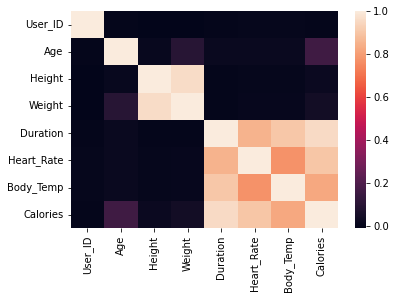

In [28]:
sb.heatmap(A.corr())

# Drop unnecessary columns

In [29]:
cat=[]
con=[]
for i in A.columns:
    if(A[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [30]:
cat

['Gender']

In [31]:
con

['User_ID',
 'Age',
 'Height',
 'Weight',
 'Duration',
 'Heart_Rate',
 'Body_Temp',
 'Calories']

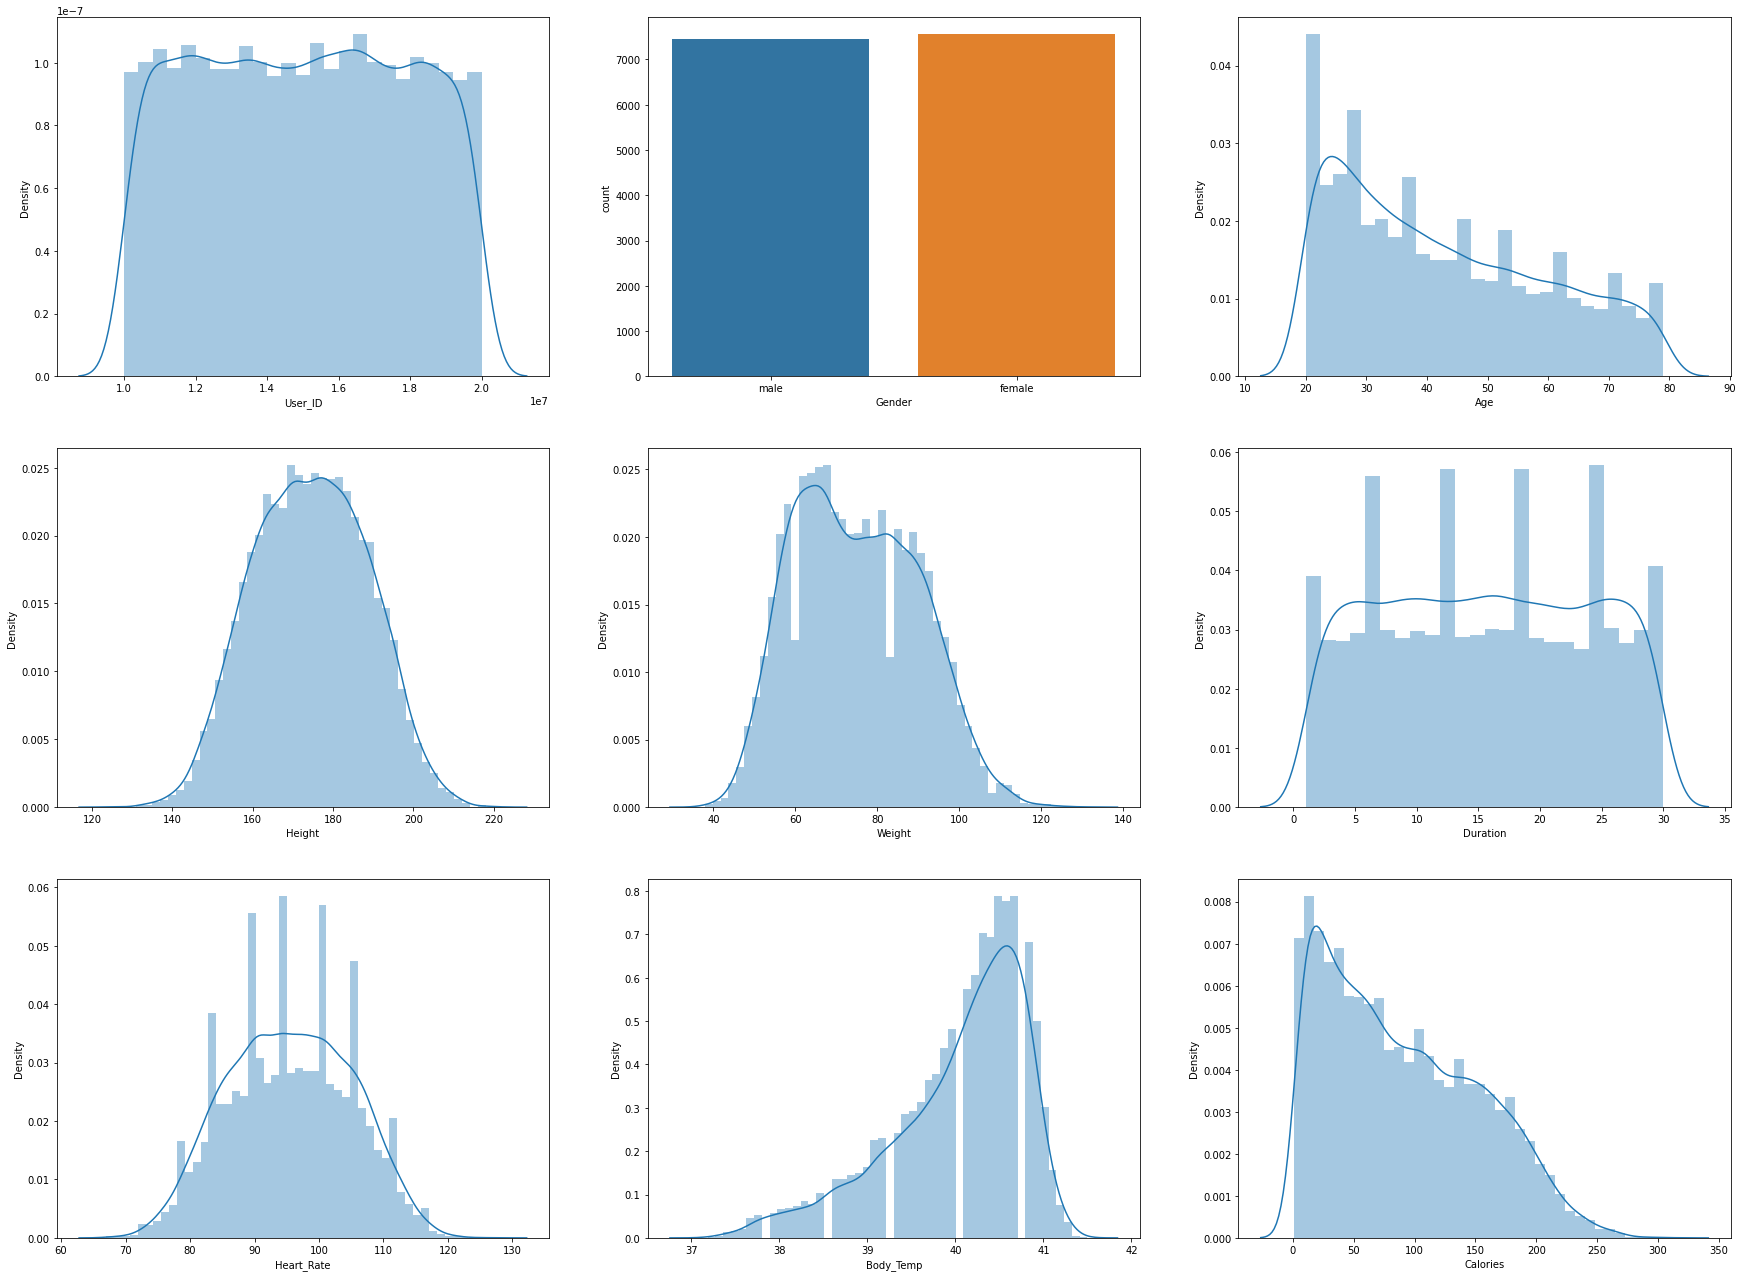

In [32]:
plt.figure(figsize=(30,70))
m = 1
for i in A.columns:
    plt.subplot(A.shape[1],3,m)
    if(A[i].dtypes=="object"):
        sb.countplot(A[i])
    else:
        sb.distplot(A[i])
    m = m + 1

In [33]:
A["User_ID"]

0        14733363
1        14861698
2        11179863
3        16180408
4        17771927
           ...   
14995    15644082
14996    17212577
14997    17271188
14998    18643037
14999    11751526
Name: User_ID, Length: 15000, dtype: int64

In [35]:
training_data = A.drop(labels=["User_ID"],axis=1)

In [36]:
training_data

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,male,78,193.0,97.0,2.0,84.0,38.3,11.0


# Exploratory Data Analysis

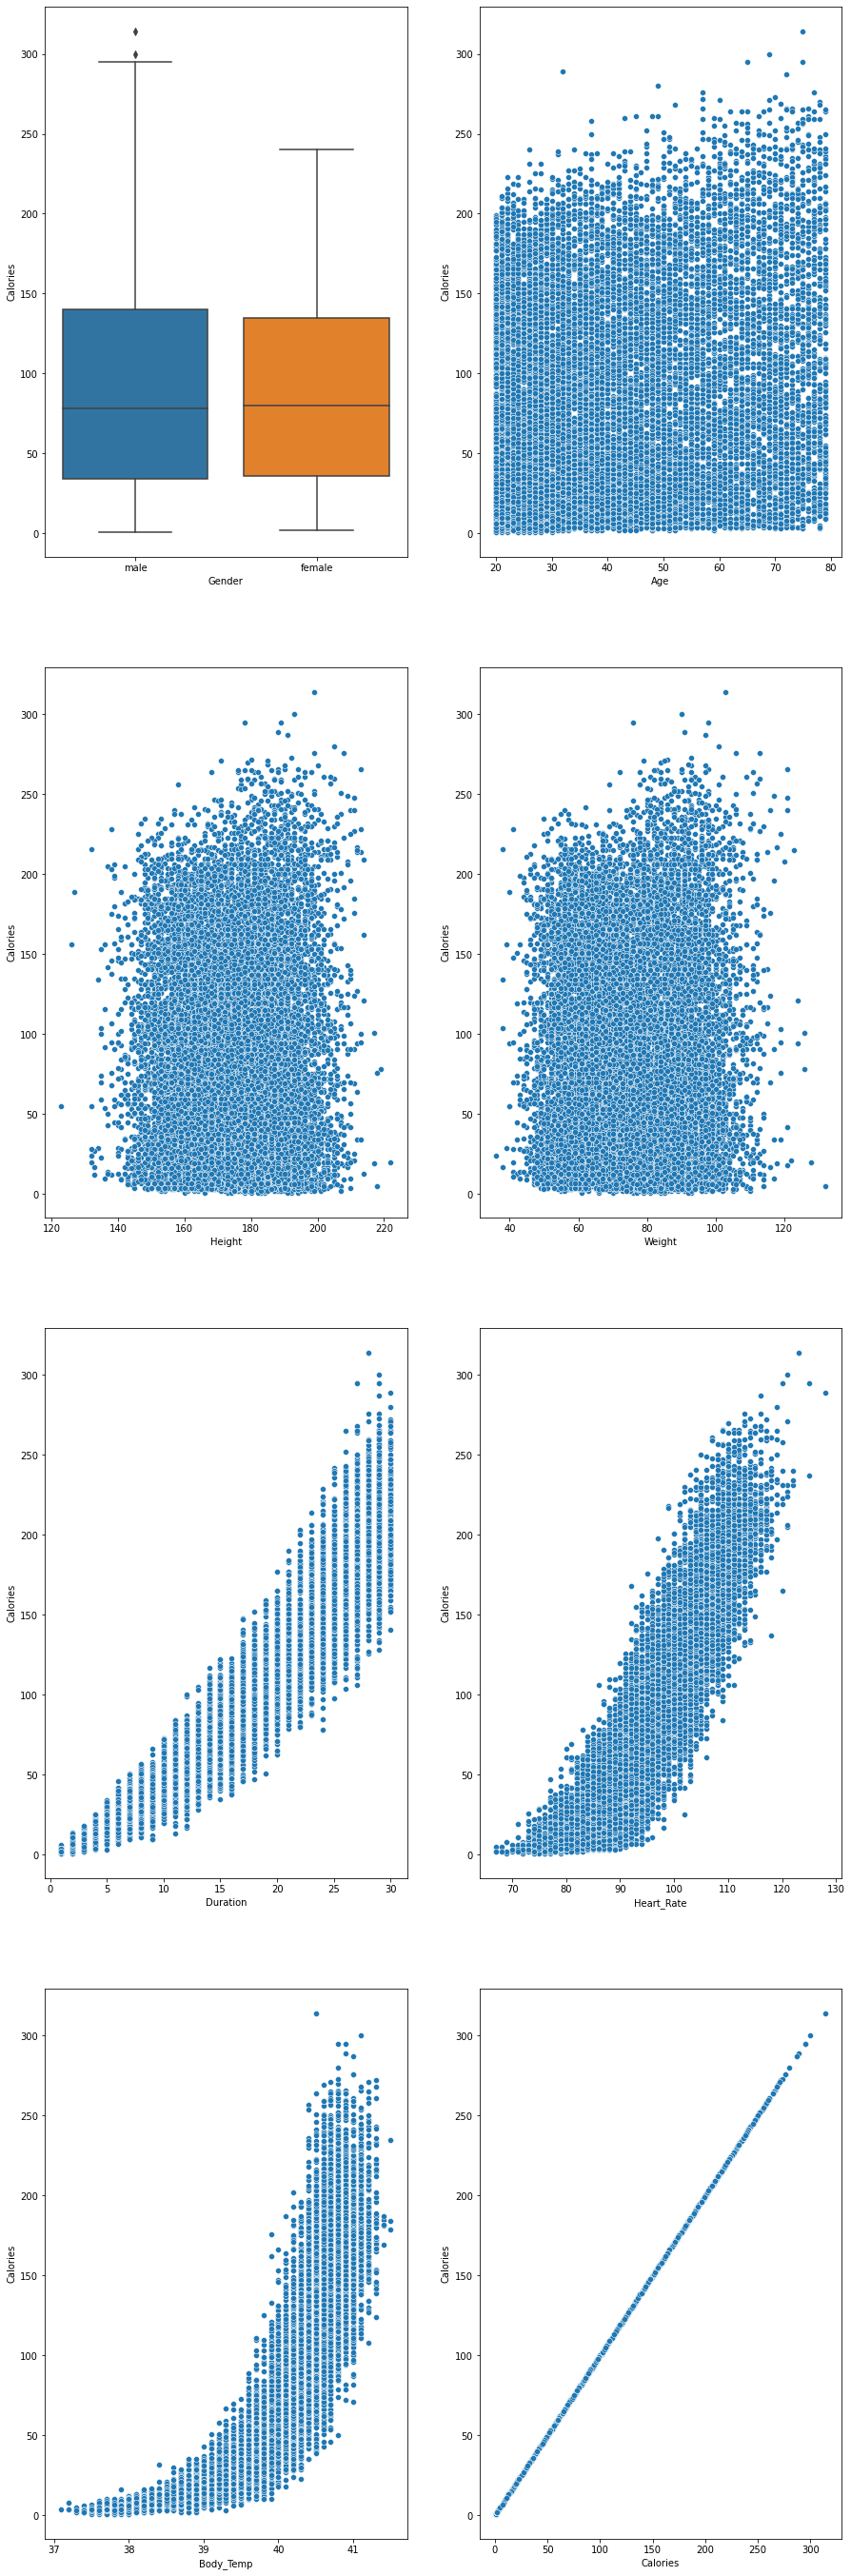

In [46]:
plt.figure(figsize=(15,100))
m = 1
for i in training_data.columns:
    plt.subplot(len(training_data.columns),2,m)
    if(training_data[i].dtypes=="object"):
        sb.boxplot(training_data[i],training_data.Calories)
    else:
        sb.scatterplot(training_data[i],training_data.Calories)
    m = m + 1

# Checking skew

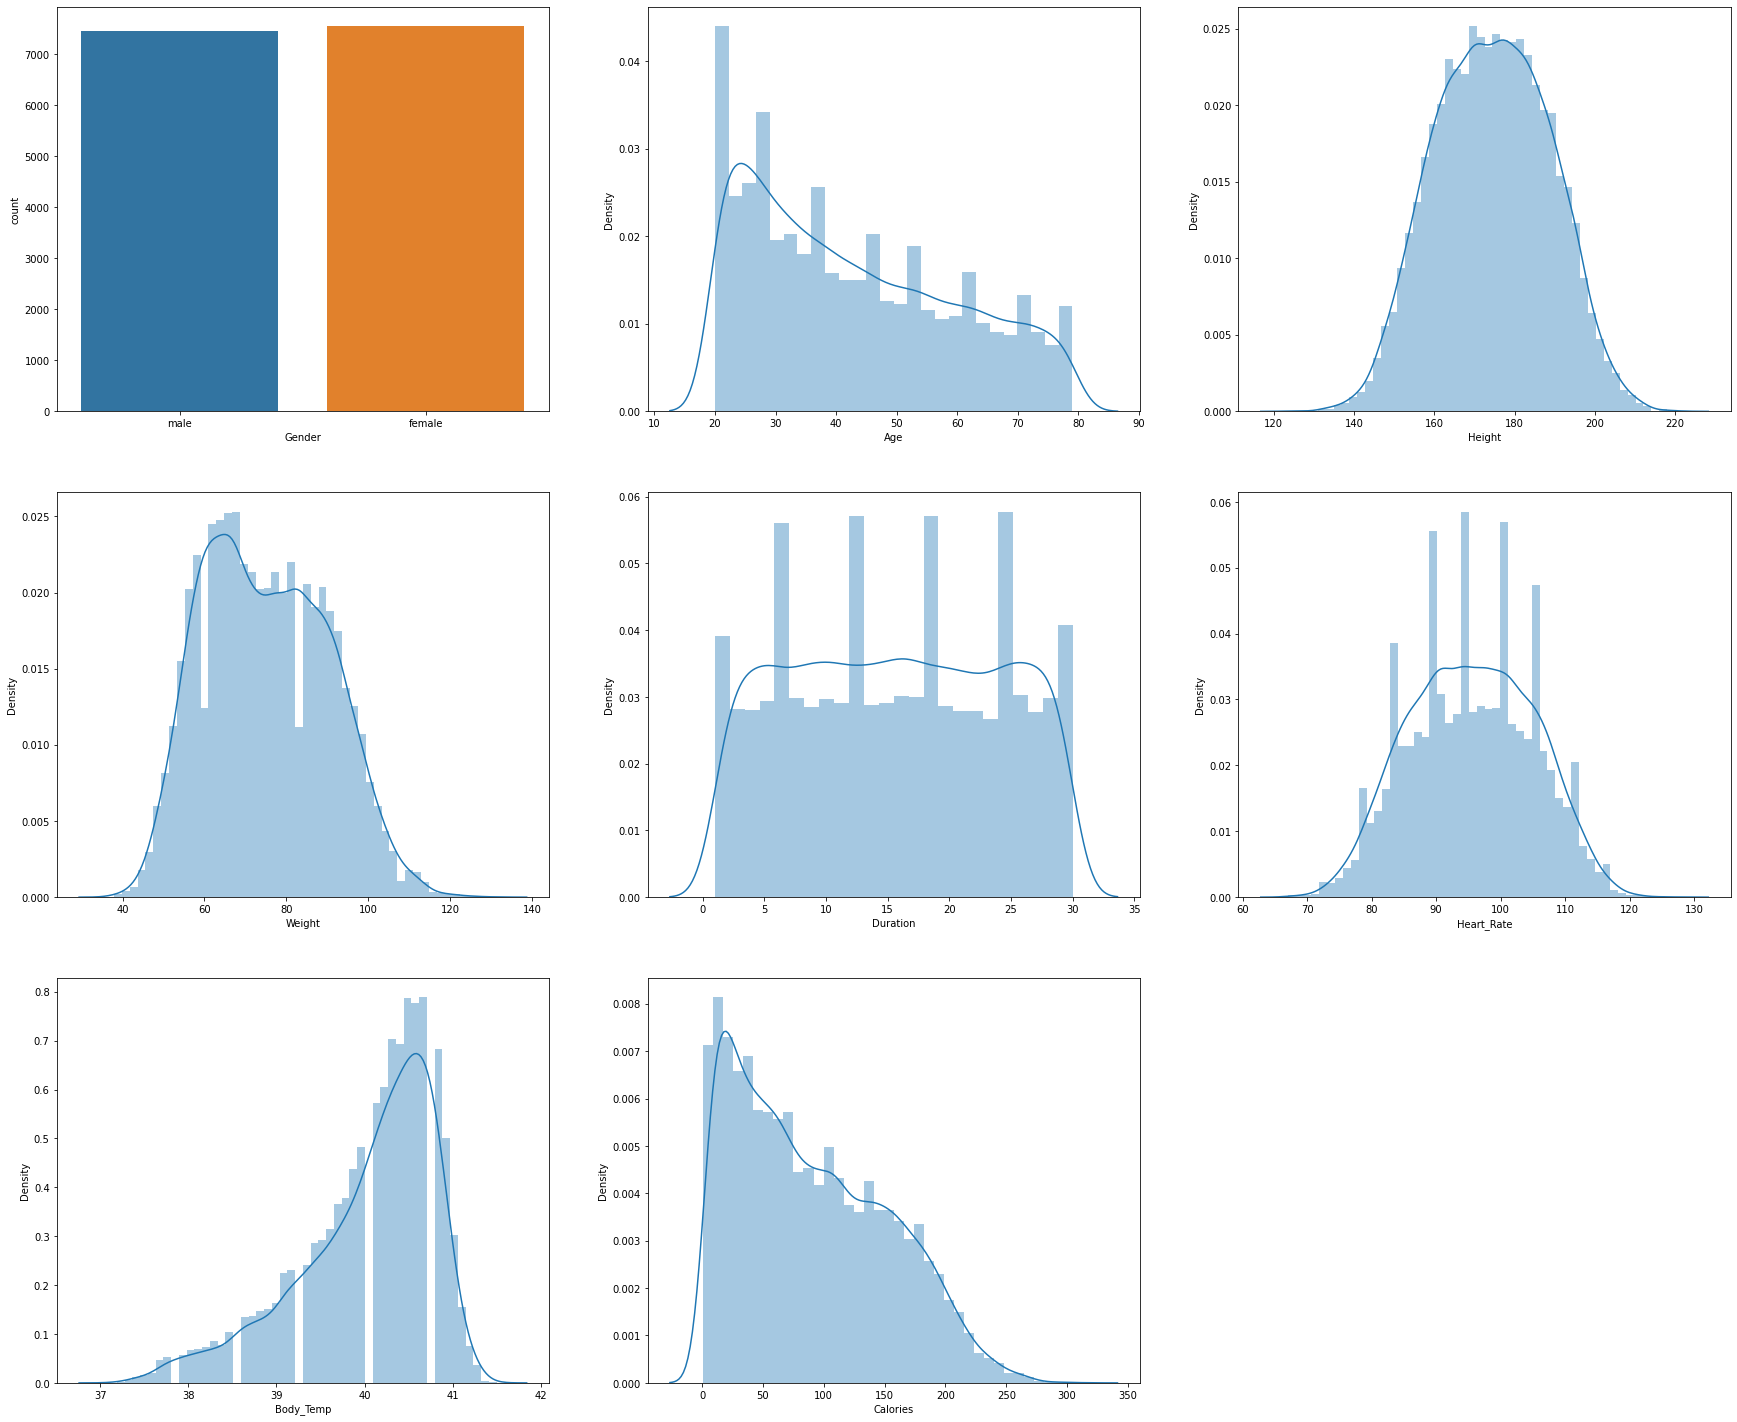

In [47]:
plt.figure(figsize=(30,70))
m = 1
for i in training_data.columns:
    plt.subplot(training_data.shape[1],3,m)
    if(training_data[i].dtypes=="object"):
        sb.countplot(A[i])
    else:
        sb.distplot(A[i])
    m = m + 1

In [49]:
cat=[]
con=[]
for i in training_data.columns:
    if(training_data[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [50]:
cat

['Gender']

In [51]:
con

['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']

In [52]:
for i in con:
    print(i,training_data[i].skew())

Age 0.47338270096138746
Height -0.006189620437893538
Weight 0.22672530725814513
Duration 0.0047505366680978415
Heart_Rate -0.01070407972854895
Body_Temp -0.9943824155974582
Calories 0.5053713740451047


# Declare Predictor and Target varibale

In [57]:
X = training_data.drop(labels=["Calories"],axis=1)

In [58]:
Y = training_data["Calories"]

# Con Cat seperator

In [59]:
cat=[]
con=[]
for i in X.columns:
    if(X[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

# Standarize the Data

In [61]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)
X2 = pd.get_dummies(X[cat])
X = X1.join(X2)

In [62]:
X

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Gender_female,Gender_male
0,1.484726,1.089582,1.265909,1.619127,0.989404,0.994023,0,1
1,-1.342179,-0.593726,-0.995458,-0.183990,-0.158461,0.352342,1,0
2,1.543620,0.318066,0.268247,-1.265861,-0.784569,-1.701035,0,1
3,-0.517665,0.318066,-0.263839,-0.304198,0.467647,0.609015,1,0
4,-0.929922,-1.435380,-1.128480,-0.664821,-1.515029,-0.289338,1,0
...,...,...,...,...,...,...,...,...
14995,-1.342179,1.299996,0.733822,-0.544614,-0.367164,0.480679,1,0
14996,-0.929922,-0.663864,-0.662904,-1.145653,-1.097623,-1.059355,1,0
14997,0.012379,-1.084691,-1.128480,0.056426,-0.575866,0.095670,1,0
14998,2.073665,1.299996,1.465441,-1.626484,-1.201975,-2.214380,0,1


# Train test split

In [63]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=2)

# Fitting Decision tree Regressor into the Training set

In [67]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(criterion='mae',random_state=2)
model = dtr.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest,pred)

3.3503333333333334

# Pruning of the Tree

In [68]:
for i in range(2,20,1):
    from sklearn.tree import DecisionTreeRegressor
    dtr = DecisionTreeRegressor(criterion='mae',random_state=2,max_depth=i)
    model = dtr.fit(xtrain,ytrain)
    pred = model.predict(xtest)
    pred1 = model.predict(xtrain)
    from sklearn.metrics import mean_absolute_error
    print(i,mean_absolute_error(ytest,pred),mean_absolute_error(ytrain,pred1))

2 16.888666666666666 16.812
3 12.69 12.60725
4 10.724666666666666 10.484833333333333
5 8.911666666666667 8.661916666666666
6 7.1605 7.037833333333333
7 5.958 5.792666666666666
8 5.087833333333333 4.62975
9 4.367 3.6233333333333335
10 3.9061666666666666 2.72575
11 3.675666666666667 1.93525
12 3.5151666666666666 1.2798333333333334
13 3.4728333333333334 0.7885
14 3.3386666666666667 0.444
15 3.3305 0.22983333333333333
16 3.2716666666666665 0.109
17 3.297833333333333 0.05458333333333333
18 3.332666666666667 0.023083333333333334
19 3.307 0.012583333333333334


In [69]:
for i in range(2,20,1):
    from sklearn.tree import DecisionTreeRegressor
    dtr = DecisionTreeRegressor(criterion='mae',random_state=2,max_depth=16,min_samples_split=i)
    model = dtr.fit(xtrain,ytrain)
    pred = model.predict(xtest)
    pred1 = model.predict(xtrain)
    from sklearn.metrics import mean_absolute_error
    print(i,mean_absolute_error(ytest,pred),mean_absolute_error(ytrain,pred1))

2 3.2716666666666665 0.109
3 3.292666666666667 0.29325
4 3.2993333333333332 0.533
5 3.332666666666667 0.75225
6 3.3373333333333335 0.9511666666666667
7 3.353 1.1471666666666667
8 3.428166666666667 1.32925
9 3.414 1.4705
10 3.4223333333333334 1.6203333333333334
11 3.463 1.736
12 3.479833333333333 1.8650833333333334
13 3.5446666666666666 1.9496666666666667
14 3.5966666666666667 2.078
15 3.5688333333333335 2.1835833333333334
16 3.5788333333333333 2.280666666666667
17 3.6278333333333332 2.349833333333333
18 3.6645 2.453333333333333
19 3.749 2.550333333333333


In [70]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(criterion='mae',random_state=2,max_depth=16,min_samples_split=2)
model = dtr.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest,pred)

3.2716666666666665